In [1]:
import sys
from collections import OrderedDict as od
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# default style
sns.set_style('whitegrid')
matplotlib.rc('font', size=17)
matplotlib.rc('text', usetex=True)

In [3]:
def plot_acc_by_layer(axis, data, label):
    x = [z[1] for z in data]
    y = [z[2] for z in data]
    axis.plot(
        x, y, 'o-',# color=data,
        linewidth=1, markersize=3,
        label=label
    )


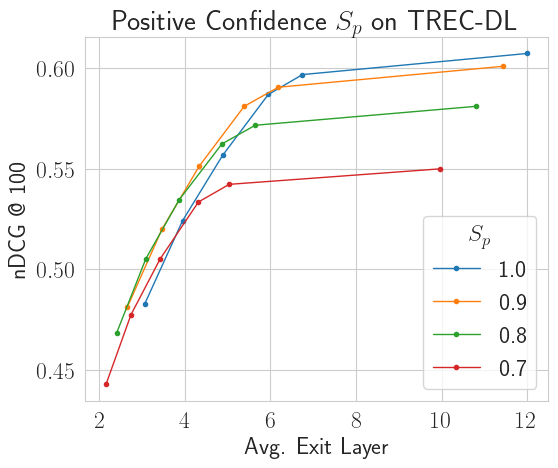

In [4]:
record = np.load('results.npy', allow_pickle=True).item()
pcs = [x[0] for x in record.keys()]

record_per_pc = {}
for (pc, nc), val in record.items():
    if pc not in record_per_pc:
        record_per_pc[pc] = []
    record_per_pc[pc].append([nc] + list(val))
for pc, lst in record_per_pc.items():
    lst.sort(key=lambda x: x[0])  # sort by nc

record_per_pc = od(sorted(record_per_pc.items(), reverse=True))


fig, axis = plt.subplots(1, 1, figsize=[6, 5])
for pc, lst in record_per_pc.items():
    plot_acc_by_layer(axis, lst, label=pc)
axis.legend(title='$S_p$', loc='lower right')
axis.set_xlabel("Avg. Exit Layer")
axis.set_ylabel("nDCG @ 100")
axis.set_title("Positive Confidence $S_p$ on TREC-DL")


plt.tight_layout()
# plt.show()
plt.savefig("trec-dl-pc_compare.pdf")